<a href="https://colab.research.google.com/github/ShivaShirsath/dl/blob/master/plantFashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded -O plant_disease_dataset.zip
! unzip plant_disease_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (132).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1320).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1321).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1322).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1323).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1324).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1325).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1326).JPG  
  infl

In [2]:
! pwd
! ls
! rm -rf Plant_leave_diseases_dataset_with_augmentation/B*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/C*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/D*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/E*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/F*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/G*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/H*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/I*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/J*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/K*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/L*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/M*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/N*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/O*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/P*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/Q*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/R*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/S*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/T*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/U*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/V*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/W*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/X*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/Y*
! rm -rf Plant_leave_diseases_dataset_with_augmentation/Z*
! pwd
! ls Plant_leave_diseases_dataset_with_augmentation/

/content
plant_disease_dataset.zip			sample_data
Plant_leave_diseases_dataset_with_augmentation
/content
Apple___Apple_scab  Apple___Cedar_apple_rust
Apple___Black_rot   Apple___healthy


In [3]:
# Importing required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [4]:
# Path to the dataset folder
data_dir = '/content/Plant_leave_diseases_dataset_with_augmentation'

# Creating a list of all the images and labels
images = []
labels = []
disease_types = os.listdir(data_dir)

for disease_type in disease_types:
    label = disease_types.index(disease_type)
    disease_folder_path = os.path.join(data_dir, disease_type)
    for img_path in os.listdir(disease_folder_path):
        img = cv2.imread(os.path.join(disease_folder_path, img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        images.append(img)
        labels.append(label)

# Converting the lists into numpy arrays
images = np.array(images)
labels = np.array(labels)

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

# Normalizing the pixel values of the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Converting the labels into one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=len(disease_types))
y_test = to_categorical(y_test, num_classes=len(disease_types))

In [5]:
# Defining the CNN model
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
  MaxPooling2D((2, 2)),

  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),

  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),

  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),

  Flatten(),

  Dense(512, activation='relu'),
  Dropout(0.5),

  Dense(len(disease_types), activation='softmax')
])

Epoch 1/25
117/117 [==============================] - 20s 71ms/step - loss: 0.7057 - accuracy: 0.7191 - val_loss: 0.3759 - val_accuracy: 0.8644
Epoch 2/25
117/117 [==============================] - 8s 64ms/step - loss: 0.3411 - accuracy: 0.8765 - val_loss: 0.4383 - val_accuracy: 0.8321
Epoch 3/25
117/117 [==============================] - 7s 61ms/step - loss: 0.2248 - accuracy: 0.9190 - val_loss: 0.1941 - val_accuracy: 0.9257
Epoch 4/25
117/117 [==============================] - 8s 65ms/step - loss: 0.2003 - accuracy: 0.9279 - val_loss: 0.2437 - val_accuracy: 0.9117
Epoch 5/25
117/117 [==============================] - 8s 64ms/step - loss: 0.1669 - accuracy: 0.9395 - val_loss: 0.1968 - val_accuracy: 0.9214
Epoch 6/25
117/117 [==============================] - 8s 66ms/step - loss: 0.1374 - accuracy: 0.9524 - val_loss: 0.1671 - val_accuracy: 0.9451
Epoch 7/25
117/117 [==============================] - 7s 58ms/step - loss: 0.1418 - accuracy: 0.9502 - val_loss: 0.1258 - val_accuracy: 0.953

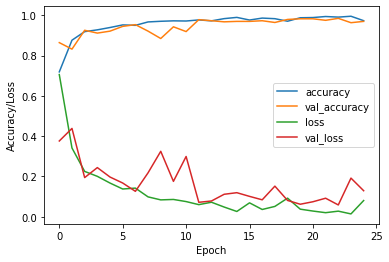

In [6]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_test, y_test))

# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plotting the accuracy and loss curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

***

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [8]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_images[..., tf.newaxis], train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images[..., tf.newaxis], test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.4037 - accuracy: 0.8532
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2579 - accuracy: 0.9057
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2149 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1837 - accuracy: 0.9325
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2606 - accuracy: 0.9122
Test accuracy: 0.9121999740600586


313/313 [==============================] - 1s 2ms/step


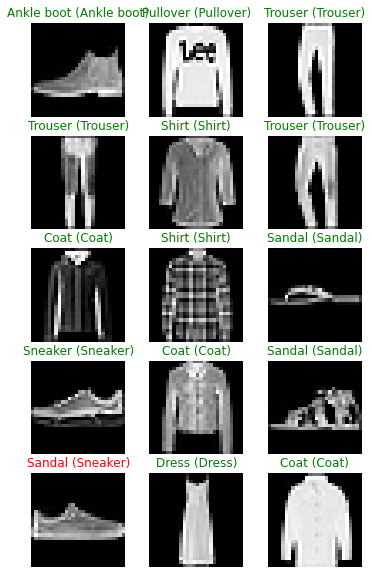

In [11]:

import numpy as np
import matplotlib.pyplot as plt

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Make predictions on the test set
predictions = model.predict(test_images[..., tf.newaxis])

# Plot a random sample of test images with their predicted labels
num_rows, num_cols = 5, 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(test_images[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.title('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color=color)
    plt.axis('off')
plt.show()